In [3]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
# if use the docker container environment, just add the path here and import autoqnn
sys.path.append("../")
# if installed the autoqnn package, just import the autoqnn
import autoqnn

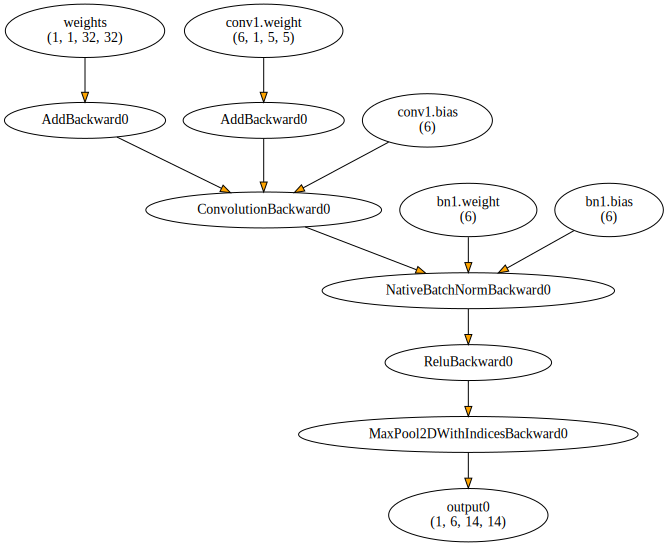

In [4]:
from torch import nn
from autoqnn.utils import view_module
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.bn1 = nn.BatchNorm2d(6) # 1 input image channel, 6 output channels, 5x5 square convolution kernel

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), (2, 2)) # Max pooling over a (2, 2) window
        return x
    
module = Net()
q_model = autoqnn.core.convert(module,
                               quantize_config_dict={
                                   "weight_quant":autoqnn.quantizers.FixedQuant(bitwidth=4),
                                   "act_quant":autoqnn.quantizers.FixedQuantAct(bitwidth=4)})
nodes,edges,dot=autoqnn.utils.view_module(q_model,(1,1,32,32))
dot

In [5]:
q_model

Net(
  (conv1): Conv2d(
    1, 6, kernel_size=(5, 5), stride=(1, 1)
    (bias_quant): Quantization()
    (weight_quant): FixedQuant()
    (act_quant): FixedQuantAct()
  )
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [8]:
# import base64
# import cv2
# img = cv2.imread('Net.png.png')
# img = cv2.resize(img,dsize=(600,500))
# cv2.imwrite("Net.png",img)

In [9]:
# # img.shape
# plt.figure(figsize=(10,20))
# plt.imshow(img)
# # base64.b64encode(img.tobytes())

In [10]:
# with open('Net.png.png','rb') as f:#二进制方式打开图文件
#     ls_f=base64.b64encode(f.read()) #读取文件内容，转换为base64编码
# ls_f

In [11]:
# import sys
# sys.path.append("")

In [12]:
# def docker_id_read(ID_file):
#     with open(ID_file,'r') as f:
#         ids = f.read().split()
#     return ids
# def docker_id_write(ids,ID_file):
#     with open(ID_file,'w') as f:
#         for i in ids:
#             f.write(i)
# def docker_exist(index):
#     ids = 
    
# ids = docker_id_read(".ID_file")
# docker_id_write(ids,".ID_file")
# ids

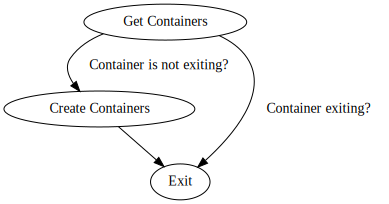

In [21]:
# from graphviz import Digraph
# g = Digraph('G', filename='hello.gv')
# g.node('node1', label='Get Containers')
# g.node('node2', label='Create Containers')
# g.node('node3', label='Exit')
# # g.node('node2', label='World')
# g.edge('node1', 'node2',"Container is not exiting?")
# g.edge('node1', 'node3',"Container exiting?")
# g.edge('node2', 'node3')
# g
# # g.view()
# # digraph G {
# #     main [shape=box];
# #     main -> parse [weight=8];
# #     parse-> execute;
# #     main -> init [style=dotted, dir = none];
# #     main -> cleanup [dir = both];
# #     execute -> {make_string, printf};
# #     init -> make_string;
# #     edge [color=red];
# #     main -> printf [style=bold, label="100 times"];
# #     make_string [label = "make a\nstring"];
# #     node [shape=box, style=filled,color=".7, .3, 1.0", fontname="Microsoft Yahei"];
# #     execute -> 比较;
# # }

In [13]:
# help(g.edge)